<a href="https://colab.research.google.com/github/Ankita-Phd/Ankita/blob/main/FMLL22_Lab11_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

In [3]:
housing_data = load_boston()
df = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
df.head()

# explain correlation in words

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


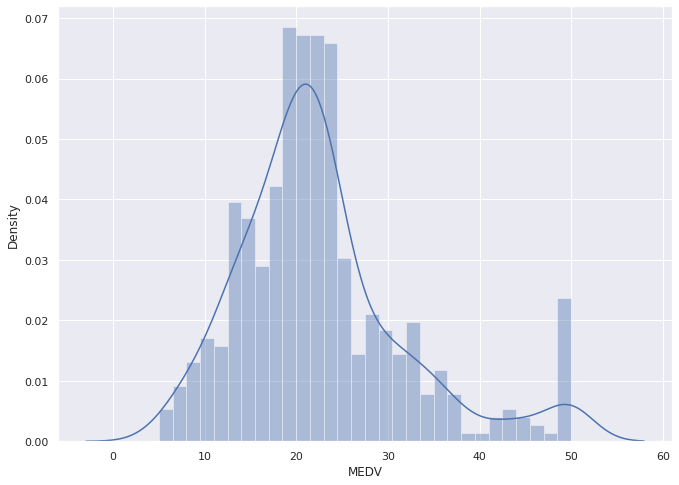

In [4]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

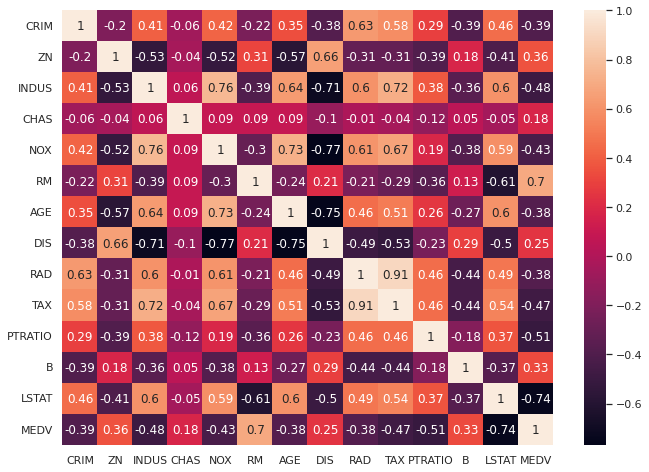

In [5]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

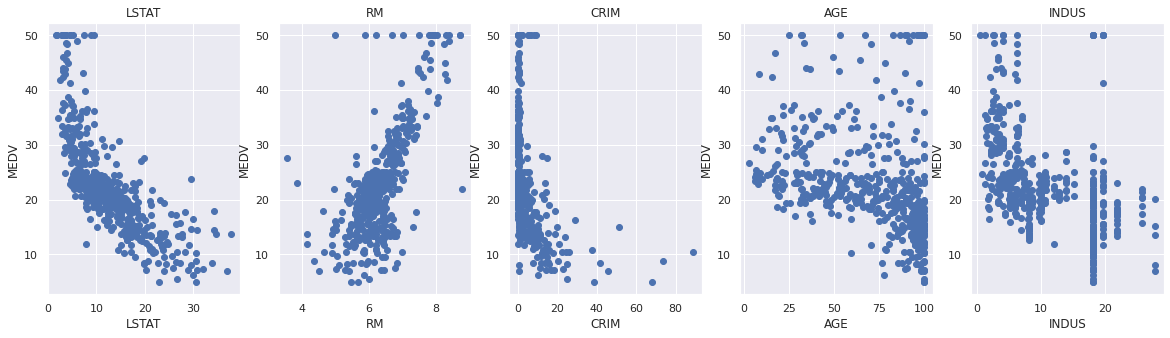

In [7]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'CRIM', 'AGE', 'INDUS']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
x_ex = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['CRIM'], df['ZN'], df['INDUS'], df['CHAS'], df['NOX'], df['AGE'], df['DIS'], df['RAD'], df['TAX'], df['PTRATIO'], df['B']], columns = ['LSTAT','RM','CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=5)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

The Coefficient and Intercept

In [13]:
print(lin_model.coef_)
print(lin_model.intercept_)

[-5.94076089e-01  3.41397332e+00 -1.30799852e-01  4.94030235e-02
  1.09535045e-03  2.70536624e+00 -1.59570504e+01  1.11887670e-03
 -1.49308124e+00  3.64422378e-01 -1.31718155e-02 -9.52369666e-01
  1.17492092e-02]
37.91248700974992


In [14]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516

Model performance for testing set
--------------------------------------
RMSE is 4.568292042303174
